In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow import keras

In [26]:
from PIL import Image
from keras.utils import to_categorical


In [4]:
import os

In [5]:
train_normal = []
train_abnormal = []

normal_dir = "/Users/tanishqsharma/Desktop/PneumoniaDetection/data/chest_xray/train/NORMAL"
pneumonia_dir = "/Users/tanishqsharma/Desktop/PneumoniaDetection/data/chest_xray/train/PNEUMONIA"

# Load NORMAL images
for filename in os.listdir(normal_dir):
    file_path = os.path.join(normal_dir, filename)  # Get full path
    try:
        img = Image.open(file_path)  # Open image with PIL
        train_normal.append(img)  # Append image object
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Load PNEUMONIA images
for filename in os.listdir(pneumonia_dir):
    file_path = os.path.join(pneumonia_dir, filename)  # Get full path
    try:
        img = Image.open(file_path)
        train_abnormal.append(img)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

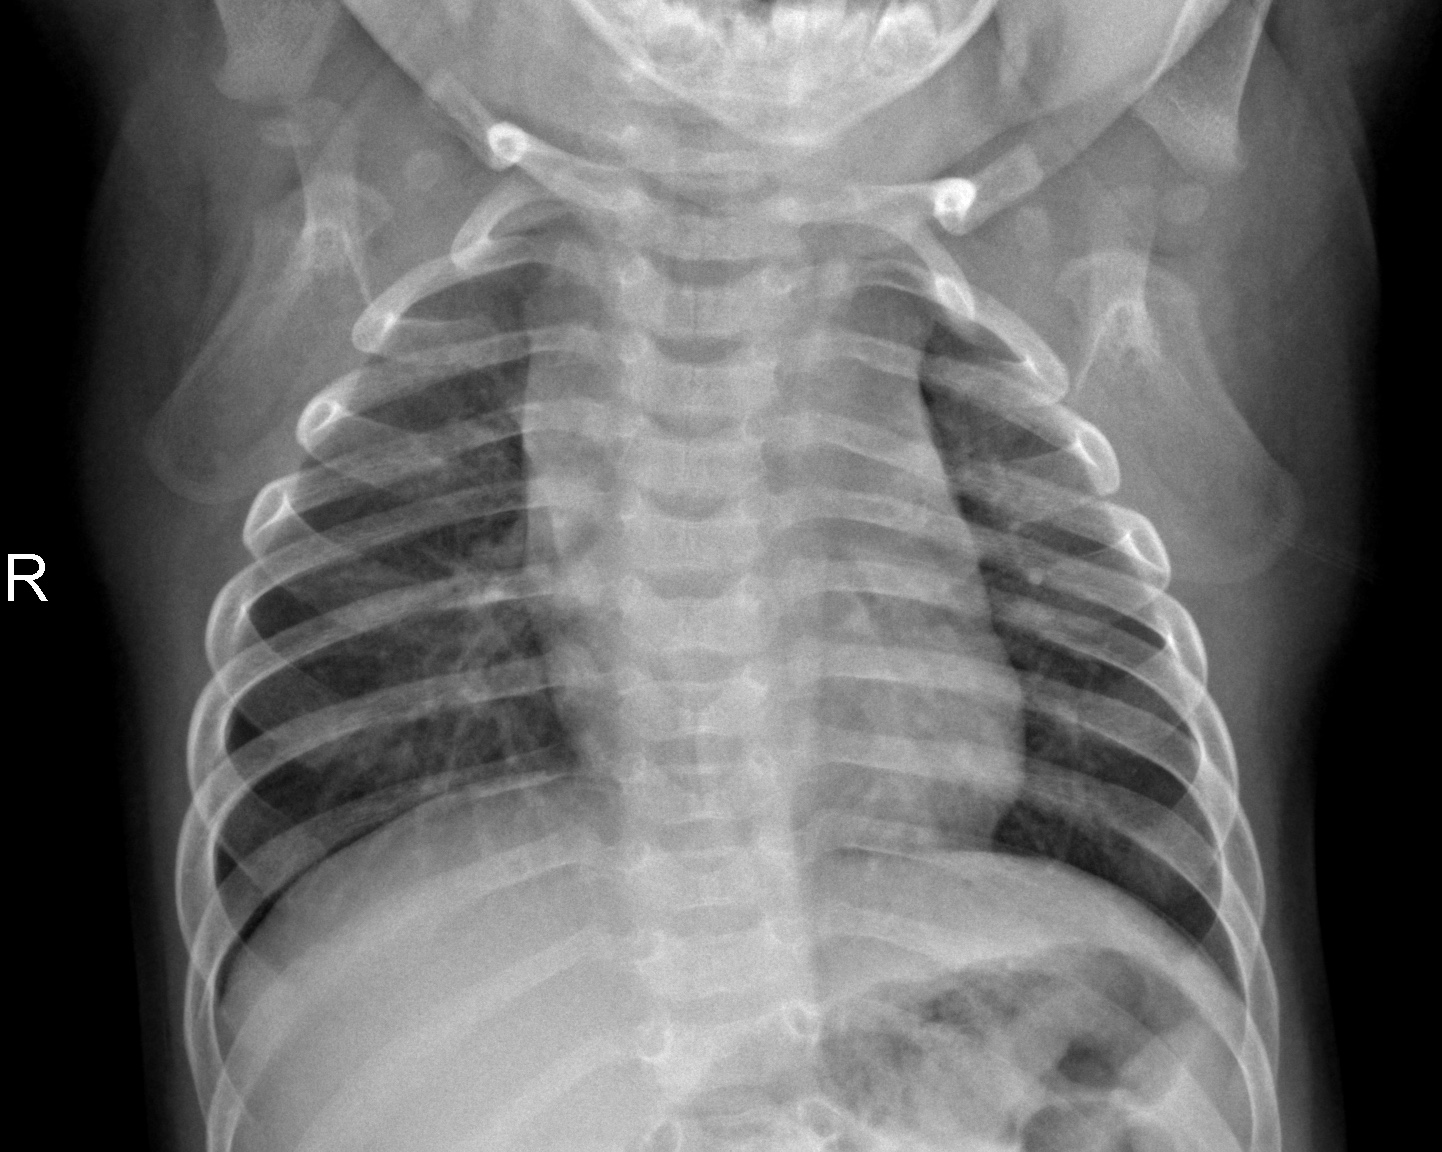

In [6]:
train_normal[10]

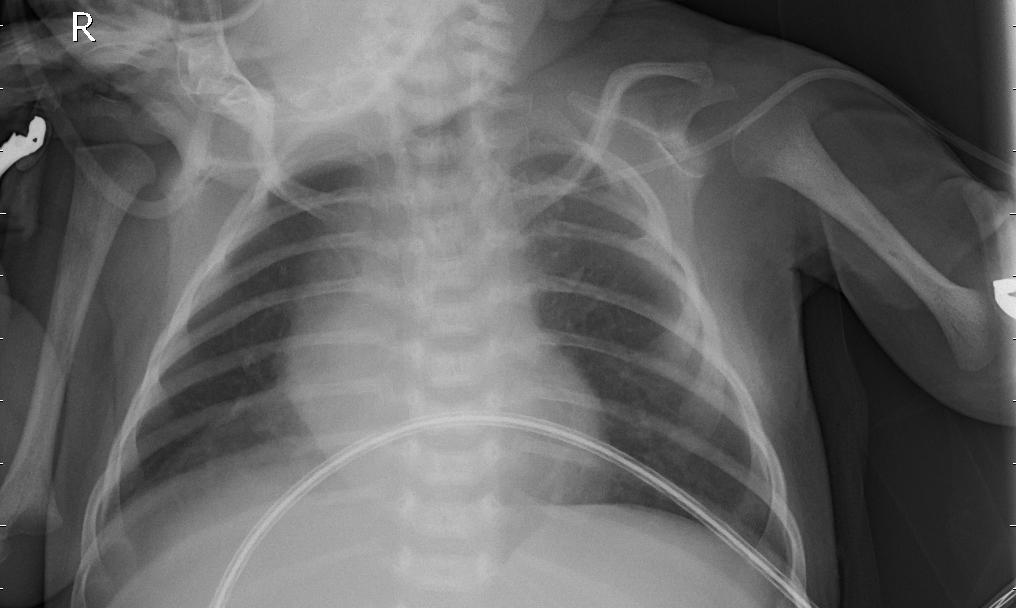

In [7]:
train_abnormal[11]

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization

In [84]:
model = Sequential()


In [10]:
for i in range(len(train_normal)):
    img = train_normal[i].resize((256,256))
    train_normal[i] = img

In [11]:
for i in range(len(train_abnormal)):
    img = train_abnormal[i].resize((256,256))
    train_abnormal[i] = img

In [85]:
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/Users/tanishqsharma/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │    31,490,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,565,890 (120.41 MB)

 Trainable params: 31,565,890 (120.41 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
train_abnormal = train_abnormal[:len(train_normal)]
labels = []
for i in range(len(train_normal)):
    labels.append(0)
for i in range(len(train_normal)):
    labels.append(1)



In [42]:
to_categorical(labels)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [16]:
import numpy as np
from PIL import Image

def pil_list_to_numpy(image_list, target_size=(256, 256)):
    processed_images = []

    for img in image_list:
        img = img.convert('RGB')  # Ensure all images have 3 channels
        img = img.resize(target_size)  # Resize to a fixed shape
        img_array = np.array(img)  # Convert to NumPy array
        processed_images.append(img_array)


    return np.array(processed_images)  # Convert list to NumPy array

# Convert images
X = pil_list_to_numpy(train_normal+train_abnormal)/255.0
# y = keras.utils.to_categorical(labels)
# print(f"Shape of X: {X.shape}")  # Expected: (num_images, 256, 256, 3)


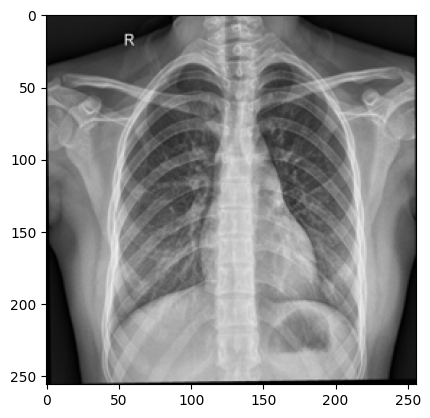

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X[0])

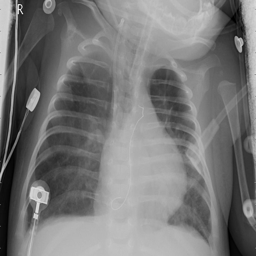

In [19]:
train_abnormal[0].convert('RGB')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..243.0].


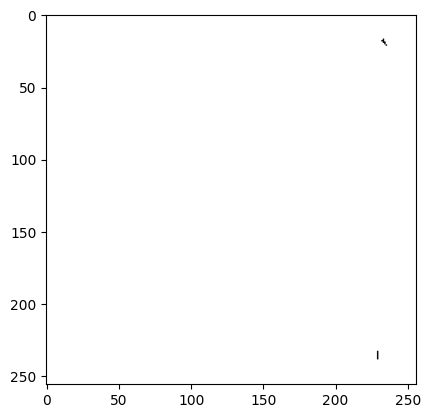

In [20]:
image = train_abnormal[0].convert('RGB')
image.resize((256,256))
image = np.array(image,dtype=np.float32)
arr = np.array(image)
plt.imshow(arr)

In [21]:
X[0]

array([[[0.09411765, 0.09411765, 0.09411765],
        [0.10980392, 0.10980392, 0.10980392],
        [0.10980392, 0.10980392, 0.10980392],
        ...,
        [0.10980392, 0.10980392, 0.10980392],
        [0.11372549, 0.11372549, 0.11372549],
        [0.03137255, 0.03137255, 0.03137255]],

       [[0.09019608, 0.09019608, 0.09019608],
        [0.10980392, 0.10980392, 0.10980392],
        [0.10980392, 0.10980392, 0.10980392],
        ...,
        [0.10980392, 0.10980392, 0.10980392],
        [0.10588235, 0.10588235, 0.10588235],
        [0.03137255, 0.03137255, 0.03137255]],

       [[0.09019608, 0.09019608, 0.09019608],
        [0.10980392, 0.10980392, 0.10980392],
        [0.10980392, 0.10980392, 0.10980392],
        ...,
        [0.10980392, 0.10980392, 0.10980392],
        [0.10588235, 0.10588235, 0.10588235],
        [0.02745098, 0.02745098, 0.02745098]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
model.fit(X,to_categorical(np.array(labels)),epochs=20)

In [32]:
test_abnormal = []
test_normal = []
normal_dir = "/Users/tanishqsharma/Desktop/PneumoniaDetection/data/chest_xray/test/NORMAL"
pneumonia_dir = "/Users/tanishqsharma/Desktop/PneumoniaDetection/data/chest_xray/test/PNEUMONIA"

# Load NORMAL images
for filename in os.listdir(normal_dir):
    file_path = os.path.join(normal_dir, filename)  # Get full path
    try:
        img = Image.open(file_path)  # Open image with PIL
        test_normal.append(img)  # Append image object
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Load PNEUMONIA images
for filename in os.listdir(pneumonia_dir):
    file_path = os.path.join(pneumonia_dir, filename)  # Get full path
    try:
        img = Image.open(file_path)
        test_abnormal.append(img)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

In [47]:
test_labels = []
for i in range(len(test_normal)):
    test_labels.append(0)
for i in range(len(test_abnormal)):
    test_labels.append(1)

In [59]:
for i in range(len(test_normal)):
    img = test_normal[i].resize((256,256))
    test_normal[i] = img

In [35]:
X_test = pil_list_to_numpy(test_normal+test_abnormal)

In [74]:
predictions = model.predict(np.array(X_test))

20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


In [73]:
predictions

array([[0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ]], dtype=float32)

In [67]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [64]:
predictions = sigmoid(predictions)

NameError: name 'sigmoid' is not defined

In [40]:
to_categorical(labels)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [66]:
ans = []
for i in predictions:
    ans.append(np.argmax(i))

In [63]:
ans

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [48]:
test_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [67]:
cnt = 0
for i in range(len(test_labels)):
    if test_labels[i] == ans[i]:
        cnt += 1
eff = cnt/len(test_labels)
eff


0.8044871794871795

In [50]:
model.add(Dense(2,activation='softmax'))

In [51]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [61]:
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model with EarlyStopping
model.fit(X,to_categorical(np.array(labels)),epochs=200,callbacks=[early_stopping],validation_data=(X_val,to_categorical(np.array(val_labels))))

Epoch 1/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9707 - loss: 0.5577 - val_accuracy: 0.6875 - val_loss: 0.6769
Epoch 2/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.9793 - loss: 0.5410 - val_accuracy: 0.6875 - val_loss: 0.6735
Epoch 3/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.9723 - loss: 0.5272 - val_accuracy: 0.6875 - val_loss: 0.6710
Epoch 4/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9742 - loss: 0.5104 - val_accuracy: 0.8125 - val_loss: 0.5967
Epoch 5/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9870 - loss: 0.4918 - val_accuracy: 0.7500 - val_loss: 0.6279
Epoch 6/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9863 - loss: 0.4776 - val_accuracy: 0.7500 - val_loss: 0.6235
Epoch 7/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9887 - loss: 0.4629 - val_accuracy: 0.8125 - val_loss: 0.5761
Epoch 8/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.9927 - loss: 0.4463 - val_accuracy: 1.

In [54]:
val_abnormal = []
val_normal = []
normal_dir = "/Users/tanishqsharma/Desktop/PneumoniaDetection/data/chest_xray/val/NORMAL"
pneumonia_dir = "/Users/tanishqsharma/Desktop/PneumoniaDetection/data/chest_xray/val/PNEUMONIA"

# Load NORMAL images
for filename in os.listdir(normal_dir):
    file_path = os.path.join(normal_dir, filename)  # Get full path
    try:
        img = Image.open(file_path)  # Open image with PIL
        val_normal.append(img)  # Append image object
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Load PNEUMONIA images
for filename in os.listdir(pneumonia_dir):
    file_path = os.path.join(pneumonia_dir, filename)  # Get full path
    try:
        img = Image.open(file_path)
        val_abnormal.append(img)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

In [55]:
X_val = pil_list_to_numpy(val_normal+val_abnormal)

In [57]:
val_labels = []
for i in range(len(val_normal)):
    val_labels.append(0)
for i in range(len(val_abnormal)):
    val_labels.append(1)


In [71]:
predictions = model.predict(np.array(X_val))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


In [72]:
predictions


array([[0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.7857695 , 0.21423055],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ],
       [0.11433259, 0.8856674 ]], dtype=float32)

In [80]:
from keras.applications import MobileNetV2
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 (excluding top layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Build the new model on top
model1 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='sigmoid')  # For binary classification
    ,Dense(2,activation='softmax')
])

# Compile the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model1.fit(X, to_categorical(labels), epochs=20, validation_data=(X_val, to_categorical(val_labels)))



/var/folders/qd/tmv28y4s4_592cm9bpq234r00000gn/T/ipykernel_13311/2570762078.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 79s 906ms/step - accuracy: 0.7405 - loss: 0.6283 - val_accuracy: 0.5000 - val_loss: 0.7051
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 61s 724ms/step - accuracy: 0.9383 - loss: 0.5760 - val_accuracy: 0.5625 - val_loss: 0.6879
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 57s 680ms/step - accuracy: 0.9508 - loss: 0.5377 - val_accuracy: 0.6875 - val_loss: 0.6314
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 57s 675ms/step - accuracy: 0.9614 - loss: 0.4982 - val_accuracy: 0.5625 - val_loss: 0.7073
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 57s 682ms/step - accuracy: 0.9681 - loss: 0.4643 - val_accuracy: 0.6875 - val_loss: 0.6167
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 58s 687ms/step - accuracy: 0.9674 - loss: 0.4383 - val_accuracy: 0.6250 - val_loss: 0.6762
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 58s 689ms/step - accuracy: 0.9661 - loss: 0.4134 - val_accuracy: 0.6250 - val_loss: 0.6995
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 60s 710ms/step - accuracy: 0.9720 - loss: 0.3877 - val_accu

In [81]:
other_predictions = model1.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 798ms/step


In [82]:
ans1 = []
for i in other_predictions:
    ans1.append(np.argmax(i))

In [83]:
cnt1 = 0
for i in range(len(test_labels)):
    if test_labels[i] == ans1[i]:
        cnt1 += 1
eff1 = cnt1/len(test_labels)
eff1


0.4823717948717949